# Evaluation de type B d'une incertitude-type :Capture d’écran 2024-02-15 à 07.24.46.png

Mesure d'une masse sur un pèse personne : m = 71,1 kg

Retrouver la variabilité de la mesure (histogramme) et méthode de Monte Carlo - Cohérence avec la formule :  u(m) = $a/\sqrt{3}$
avec $a$ la demi-étendue.

Utiliser l'instruction de la bibilothèque numpy random.uniform(Valeur1,Valeur2, Nombre) qui tire N nombres au hasard entre les valeurs 1 et 2, et les mets dans un tableau, estimer la valeur et l'incertitude-type, puis représenter la dispersion des valeurs obtenues par un histogramme en appelant l'instruction hist() de la bibliothèque matplotlib.pyplot

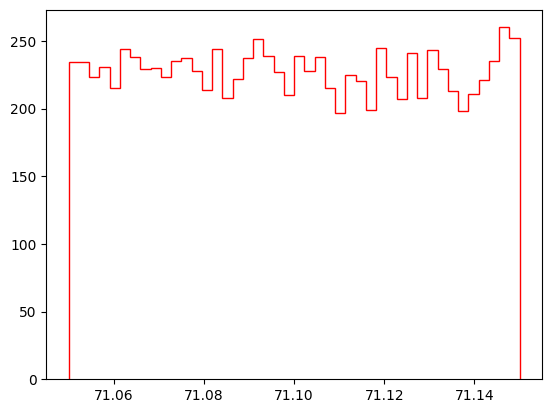

theorie sigma =  0.02886751345948129
monte carlo s =  0.02902209954240133


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
m = np.random.uniform(71.05, 71.15, 10000)


plt.figure()
plt.hist(m, bins='rice', color='red', histtype='step')
plt.show()

print('theorie sigma = ', 0.05/np.sqrt(3))
print('monte carlo s = ', np.std(m, ddof=1))

# Cohérence avec la propagation des incertitudes !

R = 100.01919027241667 u(R) =  1.2917975061664553
u_R_propa = 1.2909944487358056


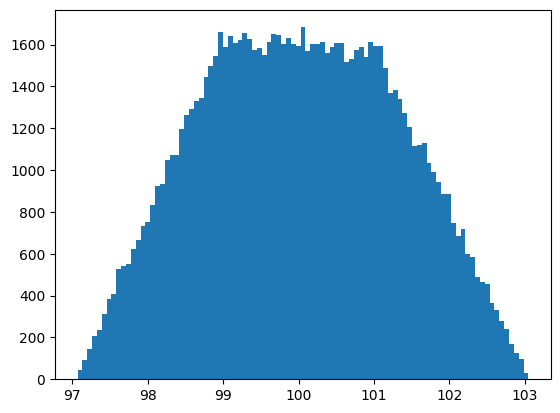

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 100000

U = 10
e_U = 0.1
U_MC = np.random.uniform(U-e_U, U+e_U, N)

I = 0.1
e_I = 2/100 * I
I_MC = np.random.uniform(I-e_I, I+e_I, N)

R_MC = U_MC / I_MC
print('R =',  np.average(R_MC), 'u(R) = ', np.std(R_MC, ddof=1))

u_R_propa = U/I * np.sqrt( (e_U/np.sqrt(3) /U)**2 + (e_I/np.sqrt(3) /I)**2 )
print('u_R_propa =', u_R_propa)

plt.figure()
plt.hist(R_MC, bins='rice')
plt.show()

# Régression linéaire ?? ou Valeur Moyenne ?

In [ ]:
U = np.arange(0, 10, 1)
e_U = 1

e_I = 1e-3
I = U/100 + np.random.uniform(-e_I, e_I ,10)
I = np.array([-0.00069913,  0.00937802,  0.0209047,   0.02942058,  0.03906523,  0.04997301,
  0.06098848,  0.0704286,   0.07959136,  0.08980022])

print(I)


[-0.00069913  0.00937802  0.0209047   0.02942058  0.03906523  0.04997301
  0.06098848  0.0704286   0.07959136  0.08980022]


R =  99.39814697719036 décalage= 0.03850353732708446


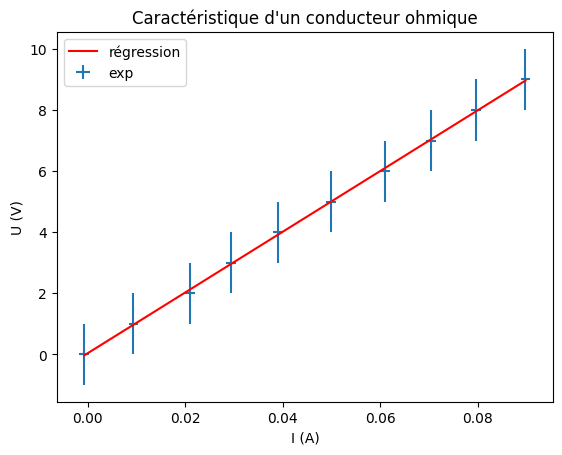

In [ ]:
pente, oo = np.polyfit(I, U, 1)
print('R = ', pente, 'décalage=', oo)



plt.figure()
plt.errorbar(I, U, xerr=e_I, yerr=e_U, fmt=',', label='exp')
plt.plot(I, pente*I+oo, '-r', label = 'régression')
plt.xlabel('I (A)')
plt.ylabel('U (V)')
plt.title("Caractéristique d'un conducteur ohmique")
plt.legend()
plt.show()


[106.63231684  95.67226509 101.96943772 102.39284397 100.05400915
  98.3792349   99.39144041 100.51342256 100.22247162]
moy_R =  100.58082691777332
u_moy_R =  3.0124388336681855


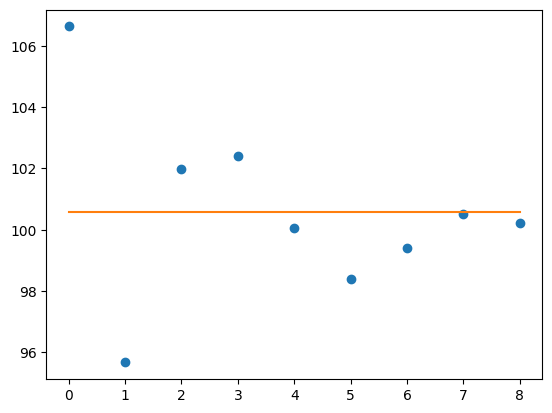

In [ ]:
R = U[1:]/I[1:]
print(R)
print('moy_R = ', np.average(R))
print('u_moy_R = ', np.std(R, ddof=1))
plt.figure()
plt.plot(R, 'o')
plt.plot([0, 8], [np.average(R), np.average(R)])
plt.show()


# Exercice :
Simuler, à l’aide d’un langage de programmation, un processus aléatoire illustrant la détermination de la valeur d’une grandeur avec incertitudes- types composées.

Mesure de l'intensité de pesanteur g à l'aide d'un pendule de lonbgueur l = 19,8 cm et une période d'oscoillation T = 0,89 s.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lvar = np.random.uniform(19.7,19.9,10)
Tvar=np.random.uniform(0.88,0.90,10)
gvar=4*np.pi**2*lvar/Tvar**2*1.0e-2
g=np.mean(gvar)
dg=np.std(gvar,ddof=1)

print('g = ',g)
print('u(g) = ',dg)